<a href="https://www.kaggle.com/code/matjes/ais22-w07-predictive-modeling-solution?scriptVersionId=99051508" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Analytical Information Systems*

# Worksheet 7 - Predictive Modeling

Matthias Griebel
Lehrstuhl für Wirtschaftsinformatik und Business Analytics

SS 2022

***

# Table of Contents

* [1. Data Mining and Predictive Modeling](#dm)
    * [1.1. CRISP-DM](#crispdm)
    * [1.2. Data Preparation](#prep)
    * [1.3. Modeling](#model)
    * [1.4. Training, validation, and test split](#split)
* [2. Predictive modeling with R Tidymodels](#pred_r)
    * [2.1. Programming Example: Credit data](#credit)
    * [2.2. Metrics for classification](#metrics)
* [3. Exercises](#exercises)
    * [3.1. Titanic Passenger Survival Classification](#titanic)
    * [3.2. Exam Questions](#exam)    
*** 

## 1. Data Mining and Predictive Modeling<a id="dm"></a>

### 1.1. CRISP-DM<a id="crispdm"></a>

The Cross-industry standard process for data mining is an open standard process model that describes common approaches used by data mining experts.
<img src="http://statistik-dresden.de/wp-content/uploads/2012/04/CRISP-DM_Process_Diagram1.png" width="50%">

We will focus on 
- `Data Preparation`
- `Modelling`

### 1.2. Data Preparation<a id="prep"></a>
- All activities to construct the final dataset
- Tasks include table, record, and attribute selection as well as transformation and cleaning
- Data preparation tasks are likely to be performed multiple times

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/05/data_prep.png" style="width:70%">

__Feature Engeneering__

> "Coming up with features is difficult, time-consuming, requires expert knowledge. Applied machine learning is basically feature engineering." (Andrew Ng)

Putting in plain vanilla variables into our model is often not the best idea (however, often a good start)
- Think about creating new variables
    - combine distance and time to create a speed variable
- Group together similar concepts to reduce factor levels
    - combine “lawyer“ and “judge” to “legal profession”
- Identify thresholds through explorative data analysis and visualization
- Reduce dimensionality of data through PCA or polynomial fitting

### 1.3. Modeling<a id="model"></a>
- Various modeling techniques are selected and applied
- Often several techniques for the same problem
- Besides the algorithms, we also need to specify evaluation procedure and metric
- Specific requirements necessitate going back to preparation

__Model Selection & Generalization__

- Learning is an ill-posed problem: data is not sufficient to find a unique solution
    - Supervised learning seeks to identify models that are able to make accurate predictions on unseen data that has similar characteristics as the data set used for training the model
    - This is referred to as generalization and should guide model selection

- To be able generalize a model needs to weigh complexity against observed error:
    - More complex models have lower observed error on training data, might have higher true error (on unknown data)
    - This is related to the bias-variance trade-off

__The Bias-Variance Trade-off__

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" style="width:40%">
 
Source: http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png

### 1.4. Training, validation, and test sets<a id="split"></a>

__Information leaks__

Every time you tune a hyperparameter of your model based on the model’s performance on the validation set, some information about the validation data leaks into the model.

__How to avoid overfitting?__

1. __Simple Hold-Out validation__

    - Set apart some fraction of your data as your test set 
    - Train on the remaining data, and evaluate on the validation set (part of your the remaining data).
    - Once your model is ready for prime time, you test it one final time on the test data.

Source: [EliteDataScience](https://elitedatascience.com/model-training)

<img src="https://elitedatascience.com/wp-content/uploads/2017/06/Train-Test-Split-Diagram.jpg" style="width:50%">

2. __K-fold cross-validation and K-fold stratified cross-validation__

    - Set apart some fraction of your data as your test set 
    - Split the remaining data into `K` partitions of equal size. For each partition `i`, train a model on the remaining `K-1` partitions, and evaluate it on partition `i`.
    - Stratified cross-validation splits the data such that the proportions between classes are the same in each fold as they are in the whole dataset 

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/05/cv_comparison.png" style="width:90%">

## 2. Predictive modeling with R Tidymodels<a id="pred_r"></a>

Similar to its sister package `tidyverse`, `tidymodels` can be used to install and load packages related to modeling and analysis. Currently, it installs and attaches `dplyr`,`ggplot2`, `purrr` as well as

- `rsample`: Create and summarize different types of resampling objects (e.g. bootstrap, cross-validation)
- `broom`: Summarizes key information about statistical objects in tidy tibbles
- `recipes`: Define a recipe or blueprint that can be used to sequentially define the encodings and preprocessing of the data
- `infer`: tidyverse-friendly statistical inference
- `yardstick`: Tidy methods for measuring model performance


The declared goal of the tidymodels metapackage is to provide a unified modelling synthax similar to scikit-learn in the python domain.

### 2.1. Programming Example: Credit data<a id="credit"></a>

The data set contains anonymized information about the credit status of bank customers.
From https://cran.r-project.org/web/packages/recipes/vignettes/Simple_Example.html

In [1]:
library(tidymodels)
library(tidyverse)
library(modeldata)
data("credit_data")
?credit_data

── Attaching packages ────────────────────────────────────── tidymodels 0.1.0 ──

✔ broom     0.5.6      ✔ recipes   0.1.12
✔ dials     0.0.6      ✔ rsample   0.0.6 
✔ dplyr     1.0.0      ✔ tibble    3.0.1 
✔ ggplot2   3.3.1      ✔ tune      0.1.0 
✔ infer     0.5.1      ✔ workflows 0.1.1 
✔ parsnip   0.1.1      ✔ yardstick 0.0.6 
✔ purrr     0.3.4      

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks dials::margin()
✖ recipes::step()   masks stats::step()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()    

In [2]:
glimpse(credit_data)

Rows: 4,454
Columns: 14
$ Status    <fct> good, good, bad, good, good, good, good, good, good, bad, g…
$ Seniority <int> 9, 17, 10, 0, 0, 1, 29, 9, 0, 0, 6, 7, 8, 19, 0, 0, 15, 33,…
$ Home      <fct> rent, rent, owner, rent, rent, owner, owner, parents, owner…
$ Time      <int> 60, 60, 36, 60, 36, 60, 60, 12, 60, 48, 48, 36, 60, 36, 18,…
$ Age       <int> 30, 58, 46, 24, 26, 36, 44, 27, 32, 41, 34, 29, 30, 37, 21,…
$ Marital   <fct> married, widow, married, single, single, married, married, …
$ Records   <fct> no, no, yes, no, no, no, no, no, no, no, no, no, no, no, ye…
$ Job       <fct> freelance, fixed, freelance, fixed, fixed, fixed, fixed, fi…
$ Expenses  <int> 73, 48, 90, 63, 46, 75, 75, 35, 90, 90, 60, 60, 75, 75, 35,…
$ Income    <int> 129, 131, 200, 182, 107, 214, 125, 80, 107, 80, 125, 121, 1…
$ Assets    <int> 0, 0, 3000, 2500, 0, 3500, 10000, 0, 15000, 0, 4000, 3000, …
$ Debt      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2500, 260, 0, 0, 0, 200…
$ Amount    <int> 800, 1000,

__Resampling with rsample__

<img align="right" src="https://github.com/tidymodels/rsample/raw/master/man/figures/logo.png" style="width:20%">


`rsample` contains a set of functions that can create different types of resamples and corresponding classes for their analysis.

- Traditional resampling techniques for estimating the sampling distribution of a statistic
- Estimating model performance using a holdout set
- Example: 
```
data_split <- initial_split(data)
train_data <- training(data_split)
test_data <- testing(data_split)
```



___Credit data: Train-Test-Split___

In [3]:
train_test_split <- initial_split(credit_data, prop = 0.7)
credit_train <- training(train_test_split)
credit_test <- testing(train_test_split)

Is this an appropriate way to split the data?

In [4]:
sum(credit_data$Status=="bad")/sum(credit_data$Status=="good")
sum(credit_train$Status=="bad")/sum(credit_train$Status=="good")
sum(credit_test$Status=="bad")/sum(credit_test$Status=="good")

[1] 0.391875

[1] 0.380868

[1] 0.418259

___Credit data: Stratified Split___

In [5]:
set.seed(0)
train_test_split <- initial_split(credit_data, prop = 0.7, strata = "Status")
credit_train <- training(train_test_split)
credit_test <- testing(train_test_split)

In [6]:
sum(credit_data$Status=="bad")/sum(credit_data$Status=="good")
sum(credit_train$Status=="bad")/sum(credit_train$Status=="good")
sum(credit_test$Status=="bad")/sum(credit_test$Status=="good")

[1] 0.391875

[1] 0.3919643

[1] 0.3916667

__Data Preprocessing with recipes__

<img align="right" src="https://recipes.tidymodels.org/logo.png" style="width:20%">

The idea of the recipes package is to define a recipe or blueprint that can be used to sequentially define the encodings and preprocessing of the data (i.e. feature engineering)

1. __Recipe:__ Define roles (outcome, predictor, etc.) and the steps to be applied to a data set in order to get it ready for data analysis

2. __Prepare:__ Estimate the required parameters from a training set that can be later applied to other data sets

3. __Bake:__ Apply the recipes to the targeted dataset.

___Credit data: Preprocessing___

There are some missing values in these data

In [7]:
credit_train[rowSums(is.na(credit_train))>0,]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
30,bad,0,NA,48,37,single,no,NA,35,NA,NA,NA,1500,1850
114,bad,0,owner,36,39,single,no,freelance,35,NA,4000,0,1000,1210
158,good,3,owner,48,25,single,no,freelance,35,NA,4000,0,1200,1449
177,bad,0,rent,60,48,separated,yes,freelance,35,NA,25300,15500,1200,1257
195,bad,0,other,36,48,married,yes,freelance,45,NA,0,0,1600,2053
241,bad,13,rent,24,49,married,no,freelance,90,NA,0,0,700,800
278,bad,2,rent,60,35,married,yes,freelance,75,NA,0,0,1000,1206
318,bad,1,rent,60,38,married,no,freelance,45,NA,0,0,1500,1850
330,good,10,owner,60,55,married,no,freelance,60,NA,10000,0,1000,1180


Rather than remove these, their values will be imputed.

The idea is that the preprocessing operations will all be created using the training set and then these steps will be applied to both the training and test set.

___Credit data: Initial Recipe___

First, we will create a recipe object from the original data and then specify the processing steps.

Recipes can be created manually by sequentially adding roles to variables in a data set.

If the analysis only required outcomes and predictors, the easiest way to create the initial recipe is to use the standard formula method:

In [8]:
rec_obj <- recipe(Status ~ ., data = credit_train)
rec_obj

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         13

The data contained in the data argument need not be the training set; this data is only used to catalog the names of the variables and their types (e.g. numeric, etc.).

___Credit data: Imputation of missing values___

Here, K-nearest neighbor imputation will be used. This works for both numeric and non-numeric predictors and defaults K to five. To do this, it selects all predictors then removes those that are numeric:

In [9]:
imputed <- rec_obj %>%
        step_knnimpute(all_predictors()) 
imputed

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         13

Operations:

K-nearest neighbor imputation for all_predictors

___Credit data: Dummy variables___

Since some predictors are categorical in nature (i.e. nominal), it would make sense to convert these factor predictors into numeric dummy variables using step_dummy. To do this, the step selects all predictors then removes those that are numeric.

In [10]:
ind_vars <- imputed %>%
        step_dummy(all_predictors(), -all_numeric()) 
ind_vars

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         13

Operations:

K-nearest neighbor imputation for all_predictors
Dummy variables from all_predictors, -, all_numeric()

___Credit data: Standardize___

At this point in the recipe, all of the predictor should be encoded as numeric, we can further add more steps to center and scale them:

In [11]:
standardized <- ind_vars %>%
        step_center(all_predictors())  %>%
        step_scale(all_predictors()) 
standardized

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         13

Operations:

K-nearest neighbor imputation for all_predictors
Dummy variables from all_predictors, -, all_numeric()
Centering for all_predictors
Scaling for all_predictors

___Credit data: Prepare___

We can now estimate the means and standard deviations from the training set. The prep function is used with a recipe and a data set:

In [12]:
trained_rec <- prep(standardized, training = credit_train)
trained_rec

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         13

Training data contained 3118 data points and 288 incomplete rows. 

Operations:

K-nearest neighbor imputation for Home, Time, Age, Marital, Records, ... [trained]
Dummy variables from Home, Marital, Records, Job [trained]
Centering for Seniority, Time, Age, Expenses, Income, ... [trained]
Scaling for Seniority, Time, Age, Expenses, Income, ... [trained]

___Credit data: Bake___

Now that the statistics have been estimated, the preprocessing can be applied to the training and test set:

In [13]:
train_data <- bake(trained_rec, new_data = credit_train) %>% na.omit()
test_data  <- bake(trained_rec, new_data = credit_test)%>% na.omit()

__Modeling with parsnip__

The `parsnip` package is a unified interface to models. This should significantly reduce the amount of syntactical minutia that you’ll need to memorize by having one standardized model function across different packages and by harmonizing the parameter names across models.

___Credit data: Model specification___

To use `parsnip`, you start with a model specification. This is a simple object that defines the intent of the model. We will be using a logistic regression for classifying the credit status:

In [14]:
credit_model <- logistic_reg()
credit_model

Logistic Regression Model Specification (classification)


___Credit data: Model engine___

`parsnip` offers a variety of methods to fit this general model. We differentiate these cases by the computational engines, which is a combination of the 
- Estimation type, such as least squares, and 
- Implemention 
    - R package or some other computing platform like Spark or Tensorflow
    - `glm` is used to fit generalized linear models

In [15]:
credit_model %>%
    set_engine("glm") -> glm_credit_model
glm_credit_model

Logistic Regression Model Specification (classification)

Computational engine: glm 


___Credit data: Fit model___

Here are no additional arguments that we should specify here, so let’s jump to fitting the actual model.

In [16]:
glm_credit_model %>%
  fit(Status ~ ., data = train_data) -> glm_fit
glm_fit

parsnip model object

Fit time:  41ms 

Call:  stats::glm(formula = formula, family = stats::binomial, data = data)

Coefficients:
      (Intercept)          Seniority               Time                Age  
         1.365208           0.698459          -0.014007          -0.114405  
         Expenses             Income             Assets               Debt  
        -0.321828           0.522553           0.370345          -0.209899  
           Amount              Price         Home_other         Home_owner  
        -0.896277           0.533144          -0.088540           0.335507  
     Home_parents          Home_priv          Home_rent    Marital_married  
         0.219138           0.003756           0.000176           0.206513  
Marital_separated     Marital_single      Marital_widow        Records_yes  
        -0.164484          -0.020322          -0.049225          -0.693397  
    Job_freelance         Job_others        Job_partime  
        -0.372894          -0.131288     

__Assess Performance with yardstick__

`yardstick` is a package to estimate how well models are working using tidy data principle

In [17]:
predicted = predict(glm_fit, test_data)
predicted_probs = predict(glm_fit, test_data, type = "prob")

test_data %>%
    select(Status) %>%
    cbind(predicted, predicted_probs) -> res
res

Status,.pred_class,.pred_bad,.pred_good
<fct>,<fct>,<dbl>,<dbl>
good,good,0.039838707,0.96016129
good,good,0.230880407,0.76911959
bad,bad,0.950725080,0.04927492
good,good,0.232281518,0.76771848
good,good,0.061555512,0.93844449
good,good,0.029904241,0.97009576
bad,good,0.379220663,0.62077934
good,good,0.040897128,0.95910287
good,good,0.031838882,0.96816112


__Confusion Matrix__

In classification problems, the primary source for evaluation metrics is the confusion matrix.

<img src="https://cdn-images-1.medium.com/max/1600/1*-BkpqhN-5fPicMifDQ0SwA.png" style="width:20%">


see https://en.wikipedia.org/wiki/Confusion_matrix

In [18]:
res %>%
    conf_mat(Status, .pred_class)

          Truth
Prediction bad good
      bad  187  100
      good 189  860

### 2.2. Metrics for classification<a id="metrics"></a>

__Accuracy__

The accuracy is the proportion of correct classifications. Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly).

$ACC = \frac{TP+TN}{TP+FP+FN+TN}$

In [19]:
res %>%
    metrics(Status, .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7836826
kap,binary,0.4236772


__Precision__

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.

$Precision = \frac{TP}{TP+FP}$

In [20]:
res %>%
    precision(Status, .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6515679


__Recall__

Recall (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.

$Recall = \frac{TP}{TP+FN}$

In [21]:
res %>%
    recall(Status, .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.4973404


__ROC Curve__

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

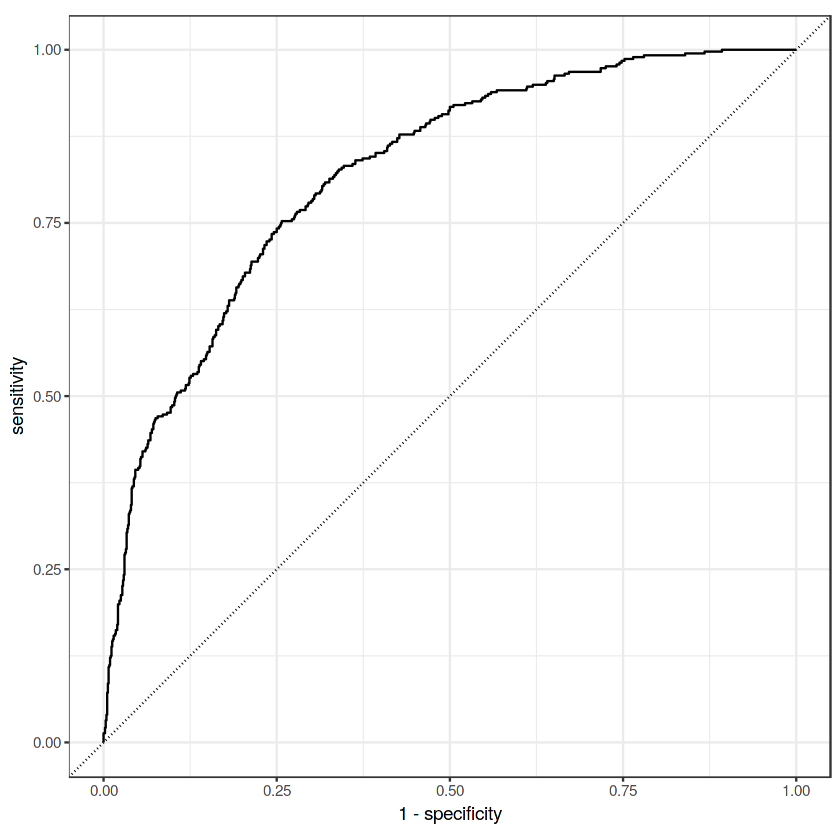

In [22]:
res %>%
    roc_curve(Status, .pred_bad) %>%
    autoplot()

## 3. Exercises<a id="exercises"></a>

### 3.1. Titanic Passenger Survival Classification<a id="titanic"></a>

__Titanic Passenger Survival Data Set__

This data set provides information on the fate of passengers on the fatal maiden voyage of the ocean liner "Titanic", summarized according to 
- economic status (class)
- sex
- age 
- survival 

The data sets are the individual non-aggregated observations and formatted in a machine learning context with a training sample, a testing sample, and two additional data sets that can be used for deeper machine learning analysis.

In [23]:
install.packages("titanic")
glimpse(titanic::titanic_train)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Rows: 891
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, …
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, …
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (F…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "ma…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14,…
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, …
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, …
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "3…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625…
$ Cabin       <chr> "", "C85", "", "C123", "", "", "E46", "", "", "", "G6", "…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S…


In [24]:
?titanic::titanic_train

Your task:

Build a classification model that predicts the survival or death of a passenger on the titanic, depending on the ticket class, age, sex, and port of embarkation.

1. Split the data into train and test set

In [25]:
titanic_split <- initial_split(data=titanic::titanic_train, prop=0.75, strata = 'Survived')
train_set <- training(titanic_split)
test_set <- testing(titanic_split)

2. Prepare a recipe for data preprocessing (use ticket class, age, sex, and port of embarkation as variables)

In [26]:
train_set %>%
    recipe(Survived ~ Pclass + Sex + Age + Embarked) %>%
    step_bin2factor(Survived) %>% # Convert independent variable/target as factor for classification
    step_meanimpute(Age) %>% # Replace missing age values with the average age of all passengers on the Titanic
    step_num2factor(Pclass, levels=c('1','2','3')) %>%
    step_dummy(Pclass, Sex, Embarked) %>% 
    step_center(all_predictors())  %>%
    step_scale(all_predictors()) %>%
    check_missing(all_predictors()) %>%
    prep() -> prep_rec

3. Bake train and test set

In [27]:
train_set_baked <- prep_rec %>% juice() # juice() equals: bake(new_data = train_set)
test_set_baked <- prep_rec %>% bake(new_data = test_set)

3. Fit the a logistic classification model (`glm`) on the train set

In [28]:
logistic_reg(mode="classification") %>%
    set_engine('glm') %>%
    fit(Survived ~ ., data=train_set_baked) -> model_reg

4. Evaluate the model on the test set


In [29]:
model_reg %>%
    predict(new_data = test_set_baked) %>%
    bind_cols(truth = test_set_baked$Survived) -> preds

preds %>% metrics(truth, .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7792793
kap,binary,0.5276596


In [30]:
preds %>% f_meas(truth, .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.7030303


In [31]:
preds %>% mcc(truth, .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mcc,binary,0.5282735


5. Train and evaluate different models using a 5-fold cross validation

In [32]:
folds <- vfold_cv(data = train_set_baked, v = 5, strata = "Survived")

In [33]:
folds$splits$`1`
analysis(folds$splits$`1`)
assessment(folds$splits$`1`)

<Training/Validation/Total>
<534/135/669>

Age,Survived,Pclass_X2,Pclass_X3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.5989866,no,-0.509410,0.9091927,0.7401291,-0.4813495,-0.3020223,0.615479
0.3960342,no,-0.509410,0.9091927,0.7401291,-0.4813495,-0.3020223,0.615479
0.0000000,no,-0.509410,0.9091927,0.7401291,-0.4813495,3.3060651,-1.622322
-2.1297879,no,-0.509410,0.9091927,0.7401291,-0.4813495,-0.3020223,0.615479
-1.2113071,yes,1.960121,-1.0982328,-1.3490961,2.0743872,-0.3020223,-1.622322
1.9268354,yes,1.960121,-1.0982328,-1.3490961,-0.4813495,-0.3020223,0.615479
-2.1297879,no,-0.509410,0.9091927,0.7401291,-0.4813495,3.3060651,-1.622322
0.0000000,yes,1.960121,-1.0982328,0.7401291,-0.4813495,-0.3020223,0.615479
0.0000000,yes,-0.509410,0.9091927,-1.3490961,2.0743872,-0.3020223,-1.622322


Age,Survived,Pclass_X2,Pclass_X3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.39603416,yes,-0.509410,-1.0982328,-1.3490961,-0.4813495,-0.3020223,0.615479
1.85029533,no,-0.509410,-1.0982328,0.7401291,-0.4813495,-0.3020223,0.615479
-0.21628633,yes,-0.509410,0.9091927,-1.3490961,-0.4813495,-0.3020223,0.615479
-1.97670774,yes,-0.509410,0.9091927,-1.3490961,-0.4813495,-0.3020223,0.615479
-0.75206676,no,-0.509410,0.9091927,0.7401291,-0.4813495,-0.3020223,0.615479
0.70219441,no,-0.509410,0.9091927,0.7401291,-0.4813495,-0.3020223,0.615479
0.08987392,no,-0.509410,0.9091927,-1.3490961,-0.4813495,-0.3020223,0.615479
0.00000000,no,-0.509410,0.9091927,0.7401291,-0.4813495,-0.3020223,0.615479
0.00000000,yes,-0.509410,0.9091927,0.7401291,2.0743872,-0.3020223,-1.622322


In [34]:
?logistic_reg()

In [35]:
logistic_reg(mode="classification", penalty=10, mixture=1) %>%
    set_engine('stan') %>%
    fit(Survived ~ ., data=analysis(folds$splits$`1`)) %>%
    predict(new_data = assessment(folds$splits$`1`)) %>%
    bind_cols(truth = assessment(folds$splits$`1`)$Survived) %>%
    accuracy(truth, .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7777778


For better reuse of the code, we define a function `fit_and_predict`

In [36]:
fit_and_predict <- function(model, split_data){
    model %>%
    fit(Survived ~ ., data=analysis(split_data)) %>%
    predict(new_data = assessment(split_data)) %>%
    bind_cols(truth = assessment(split_data)$Survived) %>%
    mcc(truth, .pred_class)
}

In [37]:
logistic_reg(mode="classification", penalty=5) %>%
    set_engine('stan') %>%
    list() %>%
    map2_df(folds$splits, fit_and_predict) -> res

Now, we can also calculate statistics on the results of the different folds

In [38]:
res
mean(res$.estimate)
sd(res$.estimate)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mcc,binary,0.5568350
mcc,binary,0.5374136
mcc,binary,0.6158305
mcc,binary,0.6308881
mcc,binary,0.5176024


[1] 0.5717139

[1] 0.04943128

Here, we are comparing different classifiers using the average Matthews correlation coefficient (mcc), which takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.

*Logistic Regression*

In [39]:
logistic_reg(mode="classification") %>%
    set_engine('stan') %>%
    list() %>%
    map2_df(folds$splits, fit_and_predict) %>%
    pull() %>% 
    mean()

[1] 0.5717139

*SVM with Radial Basis Function*

In [40]:
svm_rbf(mode="classification") %>%
    set_engine('kernlab') %>%
    list() %>%
    map2_df(folds$splits, fit_and_predict) %>%
    pull() %>% 
    mean()

[1] 0.6396592

*Random Forest Classifier*

In [41]:
rand_forest(mode="classification") %>%
    set_engine('ranger') %>%
    list() %>%
    map2_df(folds$splits, fit_and_predict) %>%
    pull() %>% 
    mean()

[1] 0.6552272

*Gradient Tree Boosting (xgboost)*

In [42]:
boost_tree(mode="classification") %>%
    set_engine('xgboost') %>%
    list() %>%
    map2_df(folds$splits, fit_and_predict) %>%
    pull() %>% 
    mean()

[1] 0.6331807

### 3.2. Exam Questions<a id="exam"></a>

**Exam AIS WS 2018/19 Question 5: Supervised Learning**

(f) (3 points) In the following example you are provided with three decision trees which form a random forest classifier:

<img align="center" src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/05/rf.png" style="width:100%">

Use the random forest to classify the following instances.

\begin{array}{|c|c|c|c|}
\hline
 Sex & 	Age &	Pclass &	Prediction \\
\hline
female &	2 &	3 &	\\
&&&\\
\hline
female &	49 &	1 &	\\
&&&\\
\hline
male &	4 &	3 &	\\
&&&\\
\hline
male &	30 &	3 &\\
&&&\\
\hline
female &	50 &	1 &	\\
&&&\\
\hline
male &	29 &	1 &\\
&&&\\
\hline
\end{array}

Solution:

> \begin{array}{|c|c|c|c|}
\hline
 Sex & 	Age &	Pclass &	Prediction \\
\hline
female &	2 &	3 &	Died\\
&&&\\
\hline
female &	49 &	1 &	Survived\\
&&&\\
\hline
male &	4 &	3 &	Survived \\
&&&\\
\hline
male &	30 &	3 &Died \\
&&&\\
\hline
female &	50 &	1 &	Survived\\
&&&\\
\hline
male &	29 &	1 &Died\\
&&&\\
\hline
\end{array}

**Exam AIS WS 2018/19 Question 3: Supervised Learning**

__(d) Model Selection and assessment__

i.  (4 points)  In  an  academic  paper,  you  will  often  find  a  phrase  such  as  “we  estimate the performance of our prediction model using 10-fold cross-validation”. Explain what is meant by 10-fold cross-validation.  What is the purpose of cross-validation and how does it work?

> For predictive modeling, cross-validation is used to validate the performance of a model and to tune its hyperparameters across different subsets to avoid overfitting and achieve generalization. To this end, a dataset is repeatedly split into a training dataset and a validation dataset. There are several types of cross-validation, such as leave-one-out cross-validation or k-fold cross-validation. The latter randomly splits the data into k groups of roughly equal size. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. 10-fold cross-validation corresponds to k-fold cross-validation with k=10.

ii. (3 points) A Data Scientist mentions a *train-validation-test* split. What is she referring to?

> - A training dataset is a dataset of examples used for learning, that is to fit the parameters (e.g., weights)
- A validation dataset is a dataset of examples used to tune the  hyperparameters (i.e. the architecture) of a model
- A test dataset is a dataset that is independent of the training dataset, but that follows the same probability distribution as the training dataset. It is used only to assess the performance (i.e. generalization) of a fully specified model.
